In [140]:
!pip install networkx[default]
!pip install matplotlib

import matplotlib.pyplot as plt
from parse import *
import numpy as np
from pprint import pprint
import networkx as nx
from networkx import Graph
from itertools import combinations

cardinalToCoord = {
    "n":[0,-1],
    "e":[+1,0],
    "s":[0,+1],
    "w":[-1,0],
}

tileToDirection = {
    "3": {"w", "e"},
    "5": {"s", "e"},
    "6": {"s", "w"},
    "7": {"s", "e", "w"},
    "9": {"n", "e"},
    "A": {"w", "n"},
    "B": {"w", "n", "e"},
    "C": {"n", "s"},
    "D": {"n", "s", "e"},
    "E": {"n", "s", "w"},
    "F": {"n", "s", "w", "e"}
}



def connectedTo(coordinate:np.array(2), directions) -> list[tuple]:
    connections = []
    for direction in directions:
        connections.append(tuple(np.array(coordinate)+np.array(cardinalToCoord[direction])))
    return connections


In [141]:
def evaluate(state: dict[tuple: str]) -> int:
    # sub grid with the same [0,0] but twice the density so all edges a coord
    graph = Graph()

    for GP in goldenPoints:
        graph.add_node((GP["x"], GP["y"]), golden=True)
        # graph.add_nodes_from(connectedTo((GP["x"], GP["y"]), ["n", "e", "s", "w"]))
        # graph.add_edges_from(zip([(GP["x"], GP["y"])] * 4, connectedTo((GP["x"], GP["y"]), ["n", "e", "s", "w"])))
    
    
    
    for tile in state.keys():
        graph.add_node((tile[0], tile[1]))
        connections = connectedTo((tile[0], tile[1]), tileToDirection[state[tile]])
        for connection in connections:
            # check if there is something there
            if connection in state.keys():
                # check that it can accept the connection
                if tile in connectedTo(connection, tileToDirection[state[connection]]):
                    graph.add_edges_from([((tile[0], tile[1]), connection)])
            elif connection in [(GP["x"], GP["y"]) for GP in goldenPoints]:
                graph.add_edges_from([((tile[0], tile[1]), connection)])
    
    score = 0
    for tile in state:
        # TODO : might be incorect -> check the problem statement
        score -= costs[state[tile]]
    
    for GPpair in combinations([(GP["x"], GP["y"]) for GP in goldenPoints], 2):
        # is there a path between the two golden points
        if nx.has_path(graph, GPpair[0], GPpair[1]):
            all_paths : list[list[tuple]] = list(nx.all_simple_paths(graph, GPpair[0], GPpair[1]))
            all_paths : list[set[tuple]] = [set(path) for path in all_paths]
            min_cost  = 1e300
            pair_score = 0
            for path in all_paths:
                # calculate the score of the path
                path_score = 0
                for silverPoint in silverPoints:
                    if (silverPoint["x"], silverPoint["y"]) in path:
                        path_score += silverPoint["score"]
                path_cost = 0
                for tile in path:
                    if tile not in [(GP["x"], GP["y"]) for GP in goldenPoints]:
                        path_cost += costs[state[tile]]
                if path_cost < min_cost:
                    min_cost = path_cost
                    pair_score = path_score
            score += pair_score
                
    if score < 0:
        score = 0

    

    nx.draw(graph, with_labels=True)
    
    return score
    

In [142]:
list(combinations([1,2,3], 2))

[(1, 2), (1, 3), (2, 3)]

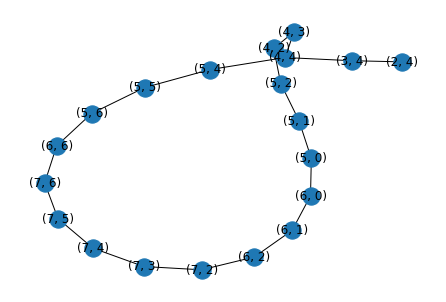

In [143]:
score = evaluate({
        (3, 4): "3",
        (4, 4): "B",
        (4, 3): "C",
        (4, 2): "5",
        (5, 2): "A",
        (5, 1): "C",
        (5, 0): "5",
        (6, 0): "6",
        (6, 1): "C",
        (6, 2): "9",
        (7, 3): "F",
        (7, 4): "F",
        (7, 5): "F",
        (7, 6): "A",
        (5, 6): "9",
        (5, 5): "E",
        (5, 4): "6",
    })

In [144]:
print(score)

499
